In [2]:
import json
from collections import Counter
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import adjusted_rand_score

from evaluate_odp import *
from search_clustering.presets import *
from search_clustering.utils.odp_239 import *

In [3]:
df = read_odp239_to_df()
data = create_odp239_splits(df)
data = embed_odp239_labels_in_splits(data)

In [106]:
read_results("evaluation_odp_gpu.json")

silhouette  \
embedding      clustering             reduction                      
Col2Vec        DBSCAN                 DummyReduction0  0.66 ± 0.14   
                                      Umap8            0.34 ± 0.22   
               HDBSCAN                DummyReduction0   -inf ± nan   
                                      Umap8            0.39 ± 0.14   
               HierarchicalClustering DummyReduction0  0.33 ± 0.12   
                                      Umap8            0.53 ± 0.07   
               KMeans                 DummyReduction0   0.35 ± 0.1   
                                      Umap8            0.54 ± 0.07   
SentenceMiniLM DBSCAN                 DummyReduction0   -inf ± nan   
                                      Umap8            0.43 ± 0.19   
               HDBSCAN                DummyReduction0   -inf ± nan   
                                      Umap8            0.43 ± 0.18   
               HierarchicalClustering DummyReduction0  0.05 ± 0.02   
                                      Umap8             0.52 ± 0.1   
               KMeans                 DummyReduction0  0.06 ± 0.02   
                                      Umap8             0.53 ± 0.1   

                                                               ari  \
embedding      clustering             reduction                      
Col2Vec        DBSCAN                 DummyReduction0    0.0 ± 0.0   
                                      Umap8            0.13 ± 0.05   
               HDBSCAN                DummyReduction0  0.03 ± 0.02   
                                      Umap8            0.12 ± 0.05   
               HierarchicalClustering DummyReduction0  0.19 ± 0.09   
                                      Umap8            0.19 ± 0.08   
               KMeans                 DummyReduction0   0.2 ± 0.11   
                                      Umap8              0.2 ± 0.1   
SentenceMiniLM DBSCAN                 DummyReduction0   -0.0 ± 0.0   
                                      Umap8            0.29 ± 0.18   
               HDBSCAN                DummyReduction0  0.03 ± 0.08   
                                      Umap8            0.21 ± 0.15   
               HierarchicalClustering DummyReduction0  0.37 ± 0.17   
                                      Umap8            0.48 ± 0.18   
               KMeans                 DummyReduction0  0.42 ± 0.18   
                                      Umap8             0.49 ± 0.2   

                                                            recall  \
embedding      clustering             reduction                      
Col2Vec        DBSCAN                 DummyReduction0  0.09 ± 0.08   
                                      Umap8             0.3 ± 0.23   
               HDBSCAN                DummyReduction0  0.14 ± 0.14   
                                      Umap8            0.28 ± 0.25   
               HierarchicalClustering DummyReduction0  0.31 ± 0.13   
                                      Umap8            0.27 ± 0.14   
               KMeans                 DummyReduction0  0.29 ± 0.14   
                                      Umap8            0.31 ± 0.17   
SentenceMiniLM DBSCAN                 DummyReduction0  0.01 ± 0.03   
                                      Umap8            0.42 ± 0.15   
               HDBSCAN                DummyReduction0  0.14 ± 0.17   
                                      Umap8            0.37 ± 0.16   
               HierarchicalClustering DummyReduction0   0.4 ± 0.14   
                                      Umap8            0.38 ± 0.13   
               KMeans                 DummyReduction0  0.38 ± 0.15   
                                      Umap8            0.41 ± 0.21   

                                                          outliers  \
embedding      clustering             reduction                      
Col2Vec        DBSCAN                 DummyReduction0   0.01 ± 0.0   
                                      Umap8            0.01 ± 0

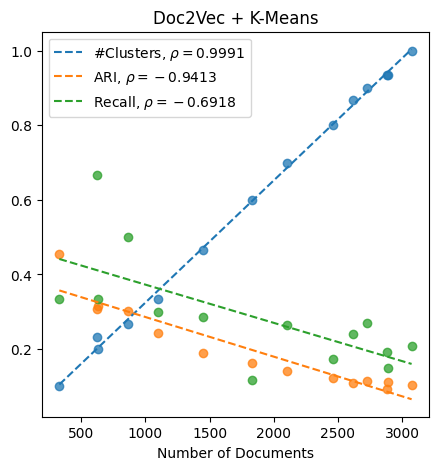

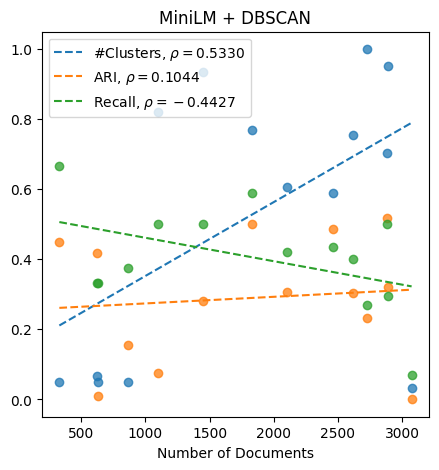

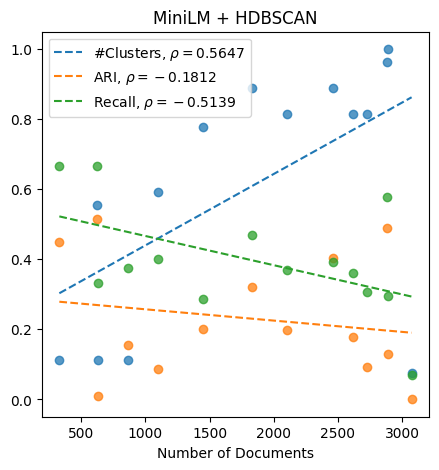

In [105]:
df_doc2vec = evaluate_detailed(data, odp_doc2vec)
df_dbscan = evaluate_detailed(data, odp_dbscan)
df_hdbscan = evaluate_detailed(data, odp_hdbscan)

plot_correlations(df_doc2vec, "Doc2Vec + K-Means")
plot_correlations(df_dbscan, "MiniLM + DBSCAN")
plot_correlations(df_hdbscan, "MiniLM + HDBSCAN")

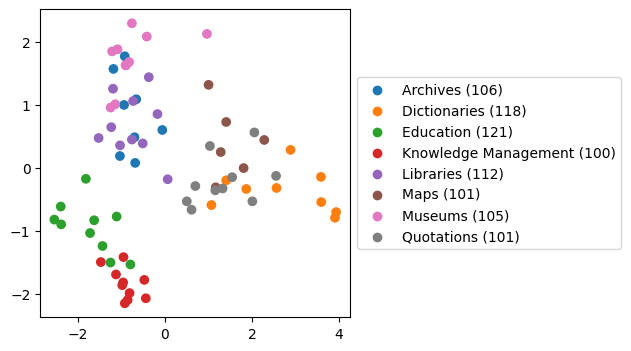

In [ ]:
from sklearn.decomposition import PCA

colors = [f"C{c}" for c in data["Reference"]["target_embeddings"].values()]
pca = PCA(n_components=2)
vecs = pca.fit_transform(np.vstack(data["Reference"]["target_embeddings"]))

fig = plt.figure(figsize=(4, 4))
counts = Counter(data["Reference"]["target"])
labels = sorted(
    set(
        [
            data["Reference"]["target_names"][x + ".1"][0]
            for x in data["Reference"]["target_embeddings"].values()
        ]
    )
)
labels = [f"{labels[i]} ({counts[str(i + 140)]})" for i in range(len(labels))]
plt.scatter(vecs[:, 0], vecs[:, 1], color=colors)
for i in range(len(labels)):
    plt.scatter(None, None, color=f"C{i}", label=labels[i])

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

[1/6] Preprocessing
[2/6] Embedding
[3/6] Reducing Dimensionality
[4/6] Clustering
[5/6] Labeling
[6/6] Visualizing


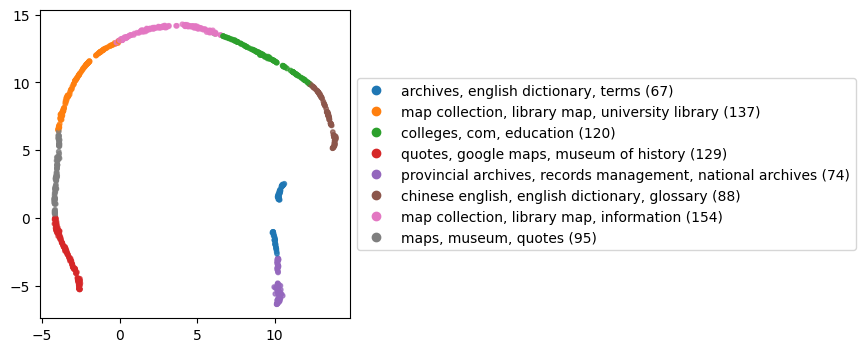

[1/6] Preprocessing
[2/6] Embedding
[3/6] Reducing Dimensionality
[4/6] Clustering
[5/6] Labeling
[6/6] Visualizing


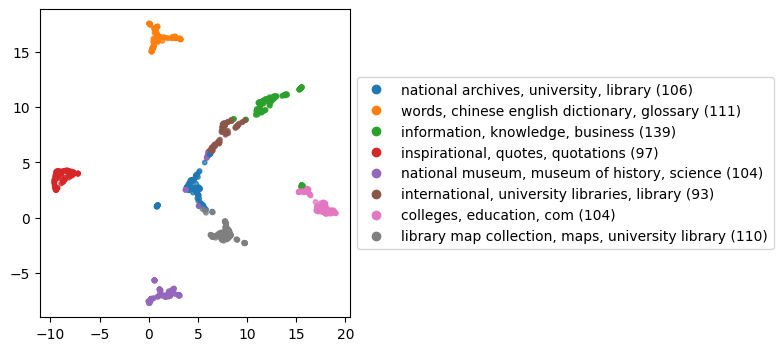

In [ ]:
_, _, _, _ = odp_doc2vec.fit_transform(data["Reference"]["data"])
_, _, _, _ = odp_kmeans.fit_transform(data["Reference"]["data"])

[1/6] Preprocessing
[2/6] Embedding
[3/6] Reducing Dimensionality
[4/6] Clustering
[5/6] Labeling
[6/6] Visualizing


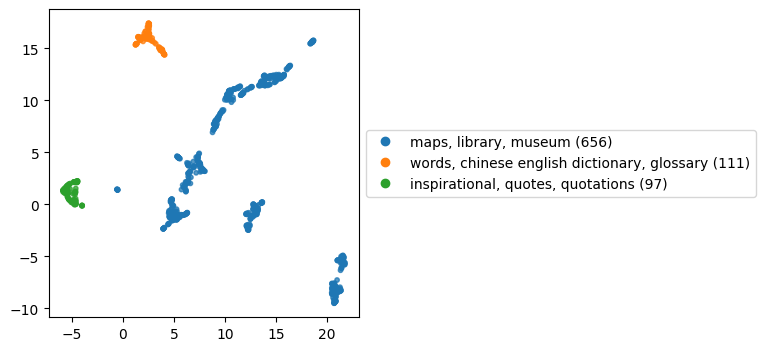

In [ ]:
docs_dbscan, clusters_dbscan, _, _ = odp_dbscan.fit_transform(data["Reference"]["data"])

[1/6] Preprocessing
[2/6] Embedding
[3/6] Reducing Dimensionality
[4/6] Clustering
[5/6] Labeling
[6/6] Visualizing


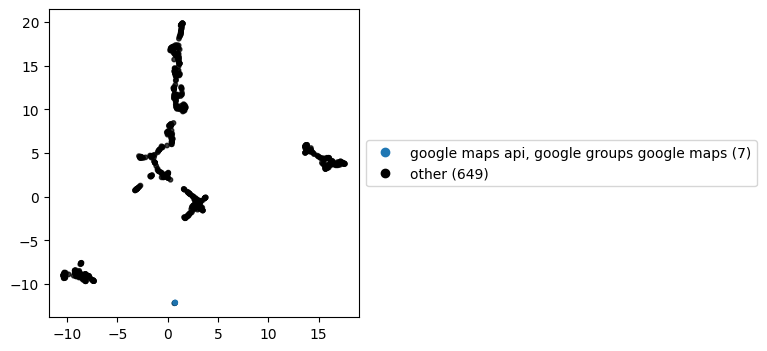

[1/6] Preprocessing
[2/6] Embedding
[3/6] Reducing Dimensionality
[4/6] Clustering
[5/6] Labeling
[6/6] Visualizing


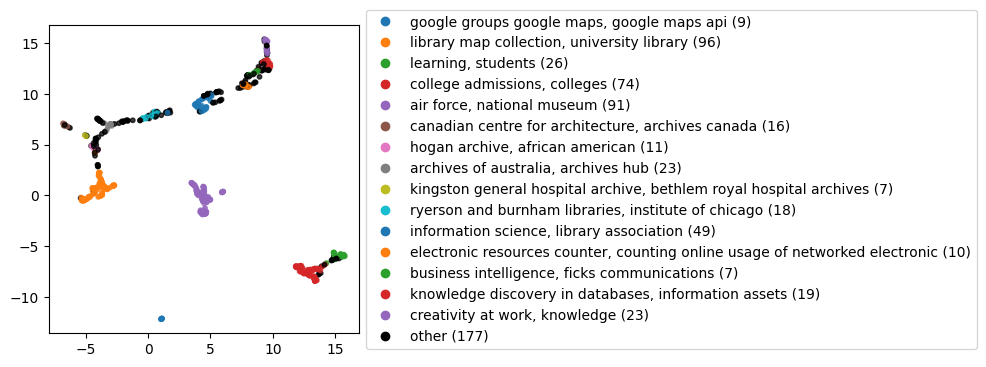

In [ ]:
docs_1 = [docs_dbscan[i] for i in np.where(clusters_dbscan == 0)[0]]
odp_dbscan.fit_transform(docs_1)
docs_other, clusters_other, _, _ = odp_hdbscan.fit_transform(docs_1)